<a href="https://colab.research.google.com/github/Michael-Augustine/FreeCodeCamp/blob/main/CoreLearningAlgorithms_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

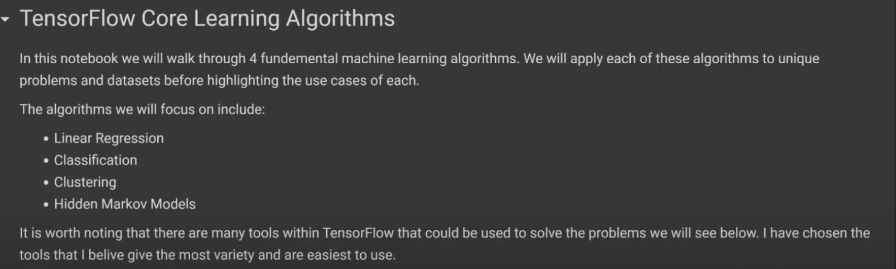

**Setup And Imports**

In [ ]:
!pip install -q sklearn


In [ ]:
%tensorflow_version 2.x 

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
#from __future__ import unicode_literals
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc 
import tensorflow as tf


In [ ]:
# Load dataset. 
dftrain = pd. read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') 
# rint(dftrain.head())
y_train = dftrain.pop('survived') 
y_eval = dfeval.pop('survived')
print(dftrain.head())
#rint(y_train)

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

In [ ]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

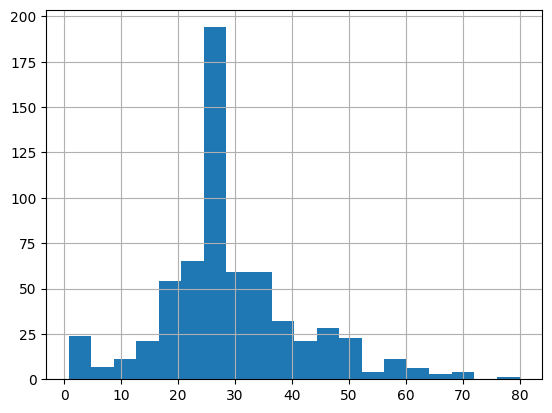

In [ ]:
dftrain.age.hist(bins=20)

<Axes: >

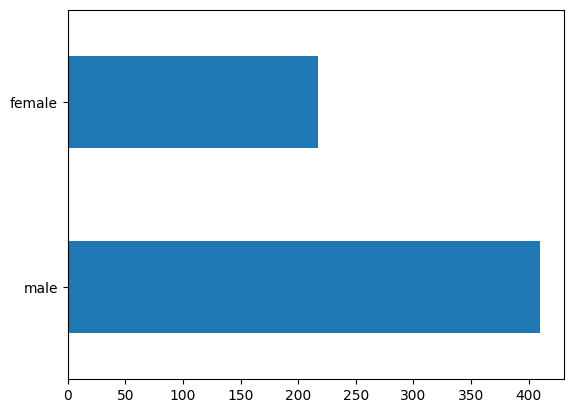

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

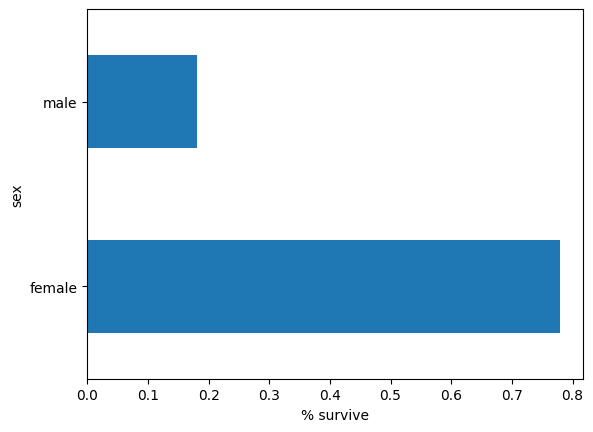

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
dfeval.shape

(264, 9)

In [ ]:
#!pip install -q sklearn

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc 
import tensorflow as tf

In [ ]:
dftrain = pd. read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') 
y_train = dftrain.pop('survived') 
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf. feature_column.categorical_column_with_vocabulary_list (feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf. feature_column. numeric_column(feature_name, dtype=tf. float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [ ]:
#dftrain["embark_town"].unique()

In [ ]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32): 
 def input_function(): #inner function, this will be returned                                          
  ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df)) 
  if shuffle:
     ds = ds.shuffle (1000) # randomize order of data
  ds = ds.batch(batch_size).repeat(num_epochs) # split dataset into batches of 32 and
  return ds # return a batch of the dataset
 return input_function # return a function object for use


train_input_fn = make_input_fn(dftrain, y_train) #
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False) # here we will call the input function 
train_input_fn()

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on tetsing data

clear_output() #clears consoke output
print(result['accuracy']) # the result variable is simply a dict of stats about our model
#print(result)

0.75


In [ ]:
result = list(linear_est.predict(eval_input_fn))
clear_output()
print(dfeval.loc[2])
print(y_eval.loc[2])
print(result[0]['probabilities'][1])

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
1
0.0727473


In [ ]:
CSV_COLUMN_NAMES = ['SepalLength', 'Sepalwidth', 'PetalLength', 'Petalwidth', 'Species'] 
SPECIES = ['Setosa', 'Versicolor', 'Virginica'] 
#Lets define some constants to help us later on

In [ ]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv") 
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv (train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv (test_path, names=CSV_COLUMN_NAMES, header=0)
   #Here we use keras (a module inside of TensorFlow) to grab our datasets and read them into a pandas dataframe

573/573 [==============================] - 0s 0us/step


In [ ]:
train.head()

,SepalLength,Sepalwidth,PetalLength,Petalwidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,Sepalwidth,PetalLength,Petalwidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [ ]:
train.shape

(120, 4)

In [ ]:
#train_y.head()

In [ ]:
from keras.engine import training
# Input Function 
def input_fn(feature, labels, training=True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(feature), labels))
  if training:
    dataset = dataset.shuffle(1000).repeat()
  return dataset.batch(batch_size)


In [ ]:
# Feature Columns 
my_feature_columns = []
for key in train.keys():
  my_feature_columns.append(tf.feature_column.numeric_column(key=key))

classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30,10],
    n_classes=3)

classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)




In [ ]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\n Test Set Accuracy:{accuracy:0.3f}\n ' .format(**eval_result))


 Test Set Accuracy:0.833
 


In [ ]:
def input_fn(features, batch_size=256):
   # Convert the inputs to a Dataset without labels.
   return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

    predict[feature]= [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    #print(pred_dict)
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))